## Introduction to Propositional Logic and FOPL

Propositional logic consists of a set of formal rules for combining propositions in order to derive new propositions.

In Python, we can use boolean variables (typically p
 and q
) to represent propositions and define functions for each propositional rule. Each rule can be implemented using the boolean operators (and, or, not) 

A truth table is a method of showing truth values of compound propositions using the truth values of its components. It is typically created with rows representing possible truth values and columns representing the propositions.

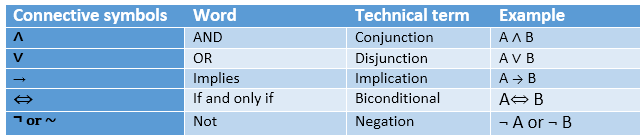

### Task 0

Implement methods that build truth tables for the following operations: negation, conjunction, disjunction, exclusive disjunction (xor), implication, biconditional

Expected output for conjunction 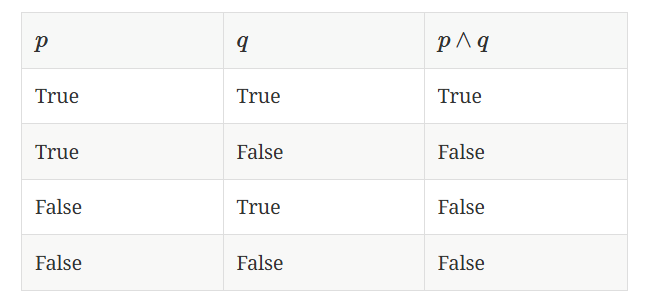

### Task 1
Make a representation that allows you to build and evaluate propositions. We take a proposition like this as input (p∧q)∨¬q and we would like to generate the truth table.

In [11]:
def truth_table(variables, expression):
    header = " | ".join(variables) + " | " + expression
    print(header)
    print("-" * len(header))
    
    for p in [False, True]:
        for q in [False, True]:
            values = {'p': p, 'q': q}
            result = eval(expression, {}, values)
            row = " | ".join(str(values[var]) for var in variables) + " | " + str(result)
            print(row)

variables = ['p', 'q']
""" 
expressions = {
    'negation': 'not p',
    'conjunction': 'p and q',
    'disjunction': 'p or q',
    'exclusive disjunction (xor)': 'p != q',
    'implication': 'not p or q',
    'biconditional': 'p == q'
}
"""
expressions = {'implication': 'not p or q'}

for operation, expression in expressions.items():
    print(f"Truth table for {operation}:")
    truth_table(variables, expression)
    print()

Truth table for implication:
p | q | not p or q
------------------
False | False | True
False | True | True
True | False | False
True | True | True



In propositional logic, we can only represent the facts, which are either true or false. PL is not sufficient to represent the complex sentences or natural language statements. The propositional logic has very limited expressive power. Consider the following sentence, which we cannot represent using PL logic:

"Some humans are intelligent", or
"Sachin likes cricket."

To represent the above statements, PL logic is not sufficient, so we required some more powerful logic, such as first-order logic.

First-Order logic:
First-order logic is another way of knowledge representation in artificial intelligence. It is an extension to propositional logic.
FOL is sufficiently expressive to represent the natural language statements in a concise way.

### Task 2


In [12]:
class Atom:
    def __init__(self, predicate, *terms):
        self.predicate = predicate
        self.terms = terms

    def __repr__(self):
        return f"{self.predicate}({', '.join(map(str, self.terms))})"

class Not:
    def __init__(self, formula):
        self.formula = formula

    def __repr__(self):
        return f"¬{self.formula}"

class And:
    def __init__(self, *formulas):
        self.formulas = formulas

    def __repr__(self):
        return f"({' ∧ '.join(map(str, self.formulas))})"

class Or:
    def __init__(self, *formulas):
        self.formulas = formulas

    def __repr__(self):
        return f"({' ∨ '.join(map(str, self.formulas))})"

class Implies:
    def __init__(self, antecedent, consequent):
        self.antecedent = antecedent
        self.consequent = consequent

    def __repr__(self):
        return f"({self.antecedent} → {self.consequent})"

class Equivalent:
    def __init__(self, formula1, formula2):
        self.formula1 = formula1
        self.formula2 = formula2

    def __repr__(self):
        return f"({self.formula1} ↔ {self.formula2})"

class Forall:
    def __init__(self, variable, formula):
        self.variable = variable
        self.formula = formula

    def __repr__(self):
        return f"∀{self.variable}({self.formula})"

class Exists:
    def __init__(self, variable, formula):
        self.variable = variable
        self.formula = formula

    def __repr__(self):
        return f"∃{self.variable}({self.formula})"

Represent the following formulas:

In [13]:
#Every person has a mother
formula1 = Forall('x', Exists('y', And(Atom('Person', 'x'), Atom('Mother', 'y', 'x'))))

#At least one person has no children
formula2 = Exists('x', And(Atom('Person', 'x'), Not(Exists('y', Atom('Parent', 'x', 'y')))))

#Define Daughter(x, y) in terms of Female(x) and Child(x, y)
formula3 = Forall('x', Forall('y', Equivalent(Atom('Daughter', 'x', 'y'), And(Atom('Female', 'x'), Atom('Child', 'x', 'y')))))

#Define Grandmother(x, y) in terms of Female(x) and Parent(x, y)
formula4 = Forall('x', Forall('y', Equivalent(Atom('Grandmother', 'x', 'y'), And(Atom('Female', 'x'), Exists('z', And(Atom('Parent', 'x', 'z'), Atom('Parent', 'z', 'y')))))))

In [14]:
print("Formula 1:", formula1)
print("Formula 2:", formula2)
print("Formula 3:", formula3)
print("Formula 4:", formula4)

"""Expected output 
Formula 1: ∀$x(∃$y((Person($x) ∧ Mother($y, $x))))
Formula 2: ∃$x((Person($x) ∧ ¬∃$y(Parent($x, $y))))
Formula 3: ∀$x(∀$y((Daughter($x, $y) ↔ (Female($x) ∧ Child($x, $y)))))
Formula 4: ∀$x(∀$y((Grandmother($x, $y) ↔ (Female($x) ∧ ∃$z((Parent($x, $z) ∧ Parent($z, $y)))))))
"""

Formula 1: ∀x(∃y((Person(x) ∧ Mother(y, x))))
Formula 2: ∃x((Person(x) ∧ ¬∃y(Parent(x, y))))
Formula 3: ∀x(∀y((Daughter(x, y) ↔ (Female(x) ∧ Child(x, y)))))
Formula 4: ∀x(∀y((Grandmother(x, y) ↔ (Female(x) ∧ ∃z((Parent(x, z) ∧ Parent(z, y)))))))


'Expected output \nFormula 1: ∀$x(∃$y((Person($x) ∧ Mother($y, $x))))\nFormula 2: ∃$x((Person($x) ∧ ¬∃$y(Parent($x, $y))))\nFormula 3: ∀$x(∀$y((Daughter($x, $y) ↔ (Female($x) ∧ Child($x, $y)))))\nFormula 4: ∀$x(∀$y((Grandmother($x, $y) ↔ (Female($x) ∧ ∃$z((Parent($x, $z) ∧ Parent($z, $y)))))))\n'

### Task 3 

Write the follwing facts in FOPL:

John likes all kinds of food.

Apples and vegetables are food

Anything anyone eats and is not killed is food.

Anil eats peanuts and is still alive

Harry eats everything that Anil eats.

In [15]:
# John likes all kinds of food.
fact1 = Forall('x', Implies(Atom('Food', 'x'), Atom('Likes', 'John', 'x')))

# Apples and vegetables are food.
fact2 = And(Atom('Food', 'Apples'), Atom('Food', 'Vegetables'))

# Anything anyone eats and is not killed is food.
fact3 = Forall('x', Forall('y', Implies(And(Atom('Eats', 'x', 'y'), Not(Atom('Killed', 'x'))), Atom('Food', 'y'))))

# Anil eats peanuts and is still alive.
fact4 = And(Atom('Eats', 'Anil', 'Peanuts'), Not(Atom('Killed', 'Anil')))

# Harry eats everything that Anil eats.
fact5 = Forall('x', Implies(Atom('Eats', 'Anil', 'x'), Atom('Eats', 'Harry', 'x')))